# Predicting stock Movement based on sentiment analysis

## Ritesh Pandey 2019132
## Rishabh Saxena 2019129


Our project is aimed to find correlation between the stock market trend and the sentiment trend on twitter for a company and its corresponding impact on the stock trend for a company

## Overall Methodology



The summary can be understood from the below flowchart

Populating the interactive namespace from numpy and matplotlib


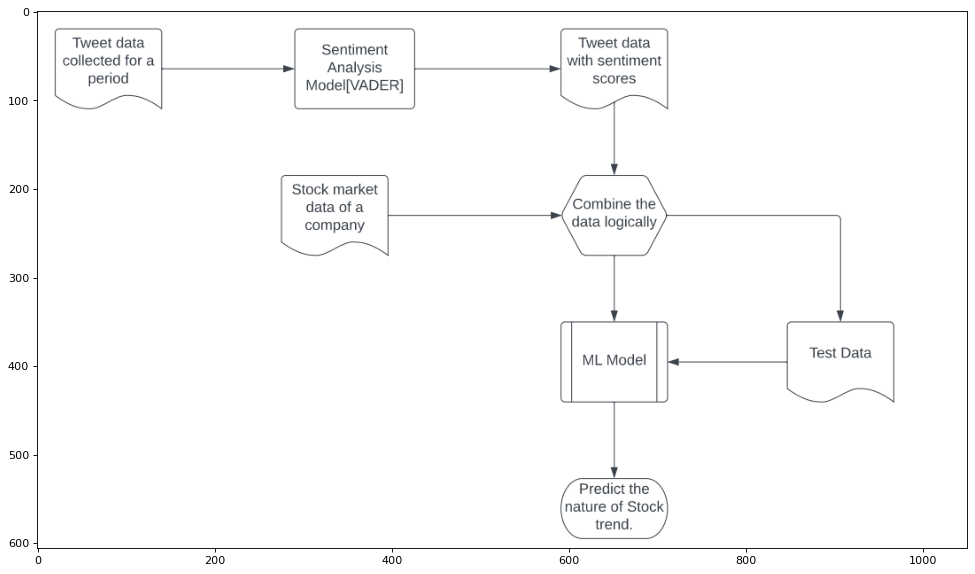

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

figure(figsize=(15 ,20), dpi=80)
img = mpimg.imread('flowcharts/overall.png')

imgplot = plt.imshow(img)
plt.show()

## Collecting tweets for about a month 

### Twitter data was fetched from Tweepy library. Due to Twitter limitations one can only fetch  tweets upto 7 days-tweet-archive, therefore we periodically(7-day window) collected data over the last month(March-2022->April-2022) which were related to Microsoft.

#### The below mentioned code is just an explanation for getting tweets from twitter. For our project we collected data regulary. The final tweets dataset could be found with other files

In [ ]:
import tweepy


# your Twitter API key and API secret
my_api_key = "UaDnqHls8aFIls5dCB2mTZIkm"
my_api_secret = "2nUbfrhMNsBguN0knYuLhabQpHocS6HB90yu0boBknW6jYqq0P"
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAO1IaQEAAAAA0wAvlYLm9YfIGbkp9KBsyk57sUg%3D0pMuZggevJw6f9yeI16j9qSgT2BTYdQpPetDkYREL6FKGRLzIs'
access_token = '1292693670936813570-8uk1i0v9WlWgojuCFvjmWnnuoybdB3'
secret_access_token = 'J3D2B7BV3BzW0qoiE0yJlqEvbTr0oyPinzPabQSWihMZW'
# authenticate
auth = tweepy.OAuthHandler(my_api_key, my_api_secret)
auth.set_access_token(access_token, secret_access_token)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
client = tweepy.Client(bearer_token = bearer_token)

query = "microsoft"

In [ ]:
response = client.search_recent_tweets(query=query, tweet_fields=['created_at','public_metrics', 'lang'], max_results=50)

## Get stock data for Microsoft(MSFT)

### The Microsoft stock data was fetched from the Yahoo library yfinance

## Our stock data collection is very different from the one which are used. Usually stock analysis is performed on per day basis

## We explored further for microanalysis, and retrieved data for 15 minute period, this could be understood with the below diagram.

###  For each day the stock market is active for 6hrs  and for each hour we have 4 fifteen minute intervals, which implies that for each day we have 6x4 = 24 Entries

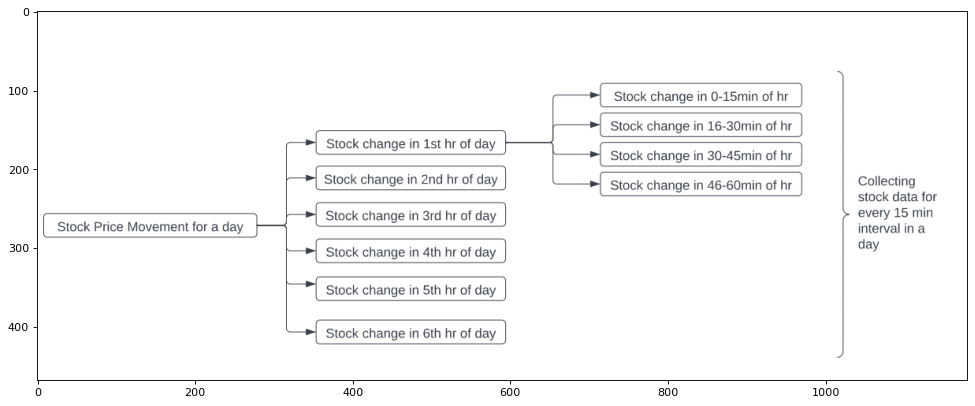

In [ ]:
figure(figsize=(15 ,20), dpi=80)
img = mpimg.imread('flowcharts/stock-data-collection.png')

imgplot = plt.imshow(img)
plt.show()


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn

In [ ]:
data_stock_microsoft = yf.download("MSFT", start="2022-03-25", end="2022-04-14", interval='15M')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_stock_microsoft.index


DatetimeIndex(['2022-03-24 14:30:00-04:00', '2022-03-24 14:45:00-04:00',
               '2022-03-24 15:00:00-04:00', '2022-03-24 15:15:00-04:00',
               '2022-03-24 15:30:00-04:00', '2022-03-24 15:45:00-04:00',
               '2022-03-25 09:30:00-04:00', '2022-03-25 09:45:00-04:00',
               '2022-03-25 10:00:00-04:00', '2022-03-25 10:15:00-04:00',
               ...
               '2022-04-13 12:15:00-04:00', '2022-04-13 12:30:00-04:00',
               '2022-04-13 12:45:00-04:00', '2022-04-13 13:00:00-04:00',
               '2022-04-13 13:15:00-04:00', '2022-04-13 13:30:00-04:00',
               '2022-04-13 13:45:00-04:00', '2022-04-13 14:00:00-04:00',
               '2022-04-13 14:15:00-04:00', '2022-04-18 16:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=365, freq=None)

In [ ]:
df_microsoft = pd.DataFrame(data_stock_microsoft)

In [ ]:
#check for na or missing values
df_microsoft.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df_microsoft.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-04-13 13:30:00-04:00,286.559998,286.579987,285.829987,285.940002,285.940002,388807
2022-04-13 13:45:00-04:00,285.940002,286.029999,285.279999,285.940094,285.940094,479875
2022-04-13 14:00:00-04:00,285.940002,286.409912,285.779999,286.000000,286.000000,416443
2022-04-13 14:15:00-04:00,286.000000,286.440002,285.950012,286.356506,286.356506,366954
2022-04-18 16:00:00-04:00,280.519989,280.519989,280.519989,280.519989,280.519989,0


In [ ]:
df_microsoft['up_or_down'] = df_microsoft.Close - df_microsoft.Open 

In [ ]:
df_microsoft['bullish_or_bearish'] = np.where(df_microsoft['up_or_down']>=0,1,-1)

In [ ]:
df_microsoft.describe()

,Open,High,Low,Close,Adj Close,Volume,up_or_down,bullish_or_bearish
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000
mean,302.963176,303.549942,302.336919,302.938337,302.938337,8.966870e+05,-0.024839,0.019178
std,10.067657,10.039614,10.092220,10.113812,10.113812,6.857905e+05,0.859039,1.001189
min,280.519989,280.519989,280.489990,280.519989,280.519989,0.000000e+00,-3.649994,-1.000000
25%,298.549988,299.440002,297.799988,298.549988,298.549988,5.020190e+05,-0.464996,-1.000000
50%,305.230011,306.274994,303.679993,304.915710,304.915710,7.041890e+05,0.000092,1.000000
75%,312.005005,312.476288,311.549988,311.980011,311.980011,9.723470e+05,0.389282,1.000000
max,315.660004,315.950012,315.119995,315.660004,315.660004,6.561456e+06,4.049927,1.000000


## Changing the timezone of the stock data as the tweets are as of IST timezone

### the stock data was of Eastern time zone

In [ ]:
temp = df_microsoft.tz_convert('Asia/Kolkata')

In [ ]:
df_microsoft = temp

In [ ]:
df_microsoft.shape

(365, 8)

## Preprocess tweet data


### The tweets collected contained many attributes like tweet_id, user_id etc. We only kept the attributes relevant to our project like { date, time, tweet, retweet count, like count , language}


In [ ]:
#load dataset
import json
cols = ['date', 'time' , 'tweet','retweets_count','likes_count','language']
data = []
file_name = 'MSFT_final_uncleaned.json'

with open(file_name, encoding='latin-1') as f:
    for line in f:
        
        try:
            doc = json.loads(line)
            lst = [doc['date'], doc['time'],doc['tweet'],doc['retweets_count'],doc['likes_count'],doc['language']]
            data.append(lst)
        except:
            break



In [ ]:
df_tweets = pd.DataFrame(data=data, columns=cols)

In [ ]:
df_tweets.shape

(185584, 6)

### Keep only english language tweets

#### The tweets were collected from a global source because of which there were tweets in other languages as well

In [ ]:
index_not_english_tweets = df_tweets[ (df_tweets['language'] != 'en') ].index
df_tweets.drop(index_not_english_tweets, inplace = True)

In [ ]:
df_tweets.head(10)

,date,time,tweet,retweets_count,likes_count,language
0,2022-04-03,05:29:58,@TessaMero You could always try to outbid Micr...,0,0,en
1,2022-04-03,05:29:53,I won the Aficionado of All Trades achievement...,0,0,en
2,2022-04-03,05:29:53,I won 2 achievements in Microsoft Wordament (M...,0,0,en
3,2022-04-03,05:29:33,@Microsoft @Xbox your crossplay sucks. Why is ...,0,0,en
4,2022-04-03,05:29:26,@BSilvaPortugal @MldGhost Took you 2 hours to ...,0,0,en
6,2022-04-03,05:28:55,Iâm definitely going to get that Microsoft w...,0,2,en
8,2022-04-03,05:28:47,High level of reader interest in this column a...,50,97,en
9,2022-04-03,05:28:25,@psychonauts8 @SenWarren @Activision @Microsof...,0,0,en
12,2022-04-03,05:27:16,@therealbigrich @SenWarren @Activision @Micros...,0,0,en
13,2022-04-03,05:26:53,@Sir_Vamped @MldGhost Textbook example of an a...,0,0,en


In [ ]:
#after keeping only english language tweets
df_tweets.shape

(122051, 6)

In [ ]:
df_tweets.isna().sum()

date              0
time              0
tweet             0
retweets_count    0
likes_count       0
language          0
dtype: int64

## Cleaning Tweet data 
### No cleaning/preprocessing(like stemming, tokenization, lemmatization) required for vader sentiment analysis


## VADER : Valence Aware Dictionary & Sentiment Reasoner
### A lexicon and rule based sentiment analyser, works well on Social data like tweets
### Considers emojis and shorthand  acronymns like LOL/ROFL etc while calculating sentiment score.

### For a given input text VADER model gives it a positive score, neutral score, negative score & compound score. The magnitude of the score defines how strong the respective sentiment is in the given input 

## Perform VADER sentiment analysis 

In [ ]:

import nltk 
import string
import re
%matplotlib inline

In [ ]:
df_tweets.isna().sum()

date              0
time              0
tweet             0
retweets_count    0
likes_count       0
language          0
dtype: int64

## Give sentiment score to each tweet

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in df_tweets.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', df_tweets.loc[indexx, 'tweet'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        df_tweets.at[indexx,'Comp']=sentence_sentiment['compound']
        df_tweets.at[indexx,'Negative']=sentence_sentiment['neg']
        df_tweets.at[indexx,'Neutral']=sentence_sentiment['neu']
        df_tweets.at[indexx,'Positive']=sentence_sentiment['pos']
        
    except TypeError:
        #print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

## Defining the importance of a tweet sentiment based on likes and retweets

### It is widely observed that if an eminent personality tweets positively about some company and it recieves good response in terms of likes and re-tweets; then the stock price of the company is obsereved to go up. Hence we have given a tweet sentiment more importance if that tweets has higher likes and retweets compared to another tweet.

### This is also a novelty of our project, as for all the research or projects in tweet sentiment analysis for stock data we came across in literature survey, they have not given preference to a particular tweet sentiment based on any metric



#### We have given a buffer like count and retweet count of 1 to each tweet so that tweets with 0 likes or 0 retweets is not discarded by the model

In [ ]:

df_tweets['retweets_count'] = df_tweets['retweets_count']+1
df_tweets['likes_count'] = df_tweets['likes_count']+1

In [ ]:
df_tweets.head()

,date,time,tweet,retweets_count,likes_count,language,Comp,Negative,Neutral,Positive
0,2022-04-03,05:29:58,@TessaMero You could always try to outbid Micr...,1,1,en,0.0000,0.000,1.000,0.000
1,2022-04-03,05:29:53,I won the Aficionado of All Trades achievement...,1,1,en,0.5719,0.000,0.821,0.179
2,2022-04-03,05:29:53,I won 2 achievements in Microsoft Wordament (M...,1,1,en,0.5719,0.000,0.748,0.252
3,2022-04-03,05:29:33,@Microsoft @Xbox your crossplay sucks. Why is ...,1,1,en,-0.1603,0.145,0.746,0.109
4,2022-04-03,05:29:26,@BSilvaPortugal @MldGhost Took you 2 hours to ...,1,1,en,-0.7184,0.176,0.824,0.000


## Finding the sentiment trend during a 15 min interval for a stock entry( MSFT)

## We find the tweets posted during that time period and try to find a cumulative sentiment score

### for a entry in the stock data, we 
    #1 find the tweets posted in the given time along with the individual sentiment score
    #2 for each tweet find the harmonic mean of the retweet count and like count to define importance of the tweet sentiment and multiply it with the respective sentiment score individualy(positive/negative/neutral/compound)
    #3 sum all the respective scores and normalize. Now we have the overal sentiment during the 15 minute interval
        

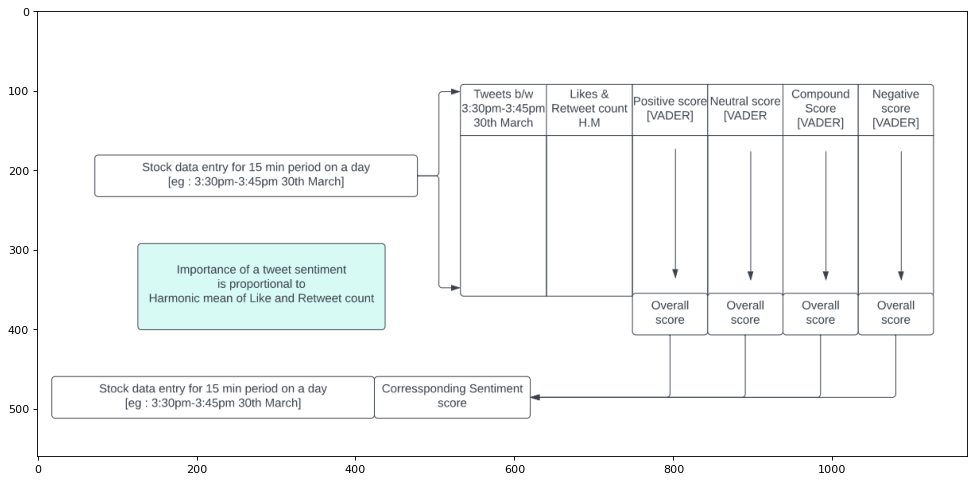

In [ ]:
figure(figsize=(15 ,20), dpi=80)
img = mpimg.imread('flowcharts/overall-sentiment-for-stock-entry.png')

imgplot = plt.imshow(img)
plt.show()


In [ ]:
df_microsoft['Positive'] = 0
df_microsoft['Positive'].astype(float)

df_microsoft['Negative'] = 0
df_microsoft['Negative'].astype(float)

df_microsoft['Neutral'] = 0
df_microsoft['Neutral'].astype(float)

df_microsoft['Compound'] = 0
df_microsoft['Compound'].astype(float)

df_microsoft['Total_Tweets'] = 0
df_microsoft['Total_Tweets'].astype(float)

Datetime
2022-03-25 00:00:00+05:30    0.0
2022-03-25 00:15:00+05:30    0.0
2022-03-25 00:30:00+05:30    0.0
2022-03-25 00:45:00+05:30    0.0
2022-03-25 01:00:00+05:30    0.0
                            ... 
2022-04-13 23:00:00+05:30    0.0
2022-04-13 23:15:00+05:30    0.0
2022-04-13 23:30:00+05:30    0.0
2022-04-13 23:45:00+05:30    0.0
2022-04-19 01:30:00+05:30    0.0
Name: Total_Tweets, Length: 365, dtype: float64

In [ ]:
df_microsoft

,Open,High,Low,Close,Adj Close,Volume,up_or_down,bullish_or_bearish,Positive,Negative,Neutral,Compound,Total_Tweets
Datetime,,,,,,,,,,,,,
2022-03-25 00:00:00+05:30,301.619995,301.779999,301.209991,301.529999,301.529999,212739,-0.089996,-1,0,0,0,0,0
2022-03-25 00:15:00+05:30,301.529999,301.950012,301.100006,301.840088,301.840088,492882,0.310089,1,0,0,0,0,0
2022-03-25 00:30:00+05:30,301.869995,302.309998,301.500000,302.049988,302.049988,944648,0.179993,1,0,0,0,0,0
2022-03-25 00:45:00+05:30,302.040009,303.019989,301.866913,302.880005,302.880005,786561,0.839996,1,0,0,0,0,0
2022-03-25 01:00:00+05:30,302.899994,303.250000,302.410004,302.899994,302.899994,896517,0.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13 23:00:00+05:30,286.559998,286.579987,285.829987,285.940002,285.940002,388807,-0.619995,-1,0,0,0,0,0
2022-04-13 23:15:00+05:30,285.940002,286.029999,285.279999,285.940094,285.940094,479875,0.000092,1,0,0,0,0,0
2022-04-13 23:30:00+05:30,285.940002,286.409912,285.779999,286.000000,286.000000,416443,0.059998,1,0,0,0,0,0


In [ ]:
import datetime
def getRelatedTweets(dates, time_start,time_end):
    time_start = datetime.datetime.strptime(time_start, '%H:%M:%S')
    time_end = datetime.datetime.strptime(time_end, '%H:%M:%S')
    
        
    #print(time_start)
    #print(time_end)
    #print(dates)
    df_filtered_date = df_tweets.query('date == @dates')
    final_list = []
    if len(df_filtered_date) == 0:
        return []
    for ind, entry in df_filtered_date.iterrows():
        
        #print(entry.time)
        time_tweet = datetime.datetime.strptime(entry.time, '%H:%M:%S')
        #print(time_tweet)
        if(time_end == '00:00:00'):
            if time_tweet>time_start:
                final_list.append(entry)
                continue
        if time_tweet < time_end and time_tweet>time_start:
            #print(time_tweet)
            final_list.append(entry)
            
            
    return final_list
    #for tweet in final_list:


In [ ]:


def performExperiment():
    #df_microsoft['sentiment'] = 0
    #df_microsoft['sentiment'].astype(float)
    count_no_tweet=0      
    for pos,index_date in enumerate(df_microsoft.index):
        #print("date : ",str(index_date)[:10])
        #print("time start :",str(index_date)[11:19])
        time_start = str(index_date)[11:19]
        hr,mins, sec = time_start.split(':')

        mins = 15 + int(mins)
        if mins==60:
            mins = '00'
            hr = str((int(hr)+1)%24)
        mins=str(mins)
        time_end = ':'.join([hr,mins,sec])
        #print("time end :",time_end)
        dates = str(index_date)[:10]

        related_tweets = getRelatedTweets(dates, time_start,time_end)

        if len(related_tweets)!=0:
            sentiment_positive = []
            sentiment_negative = []
            sentiment_compound = []
            sentiment_neutral = []
            
            count = 0
            for each_Tweet in related_tweets:

                harmonic_mean_of_like_and_retweet = 2*each_Tweet['likes_count']*each_Tweet['retweets_count']/(each_Tweet['likes_count'] + each_Tweet['retweets_count'])
                
                count+=each_Tweet['likes_count']
                #sentiments.append(score)
                sentiment_positive.append(each_Tweet['Positive']*harmonic_mean_of_like_and_retweet)
                sentiment_negative.append(each_Tweet['Negative']*harmonic_mean_of_like_and_retweet)
                sentiment_compound.append(each_Tweet['Comp']*harmonic_mean_of_like_and_retweet)
                sentiment_neutral.append(each_Tweet['Neutral']*harmonic_mean_of_like_and_retweet)
            #normalize
            sentiment_positive = [each/count for each in sentiment_positive]
            sentiment_negative = [each/count for each in sentiment_negative]
            sentiment_compound = [each/count for each in sentiment_compound]
            sentiment_neutral = [each/count for each in sentiment_neutral]
            #final_score = sum(sentiments)
            
            
            df_microsoft.iloc[pos,-5] = sum(sentiment_positive)
            df_microsoft.iloc[pos,-4] = sum(sentiment_negative)
            df_microsoft.iloc[pos,-3] = sum(sentiment_neutral)
            df_microsoft.iloc[pos,-2] = sum(sentiment_compound)
            df_microsoft.iloc[pos,-1] = len(sentiment_compound)
            


In [ ]:
performExperiment()

In [ ]:
#normalised scores
df_microsoft

,Open,High,Low,Close,Adj Close,Volume,up_or_down,bullish_or_bearish,Positive,Negative,Neutral,Compound,Total_Tweets
Datetime,,,,,,,,,,,,,
2022-03-25 00:00:00+05:30,301.619995,301.779999,301.209991,301.529999,301.529999,212739,-0.089996,-1,0.028263,0.010602,0.180778,0.026740,107
2022-03-25 00:15:00+05:30,301.529999,301.950012,301.100006,301.840088,301.840088,492882,0.310089,1,0.010840,0.015012,0.185648,-0.013914,118
2022-03-25 00:30:00+05:30,301.869995,302.309998,301.500000,302.049988,302.049988,944648,0.179993,1,0.055776,0.018822,0.493996,0.150927,146
2022-03-25 00:45:00+05:30,302.040009,303.019989,301.866913,302.880005,302.880005,786561,0.839996,1,0.044556,0.015599,0.462323,0.103039,125
2022-03-25 01:00:00+05:30,302.899994,303.250000,302.410004,302.899994,302.899994,896517,0.000000,1,0.037979,0.015081,0.291598,0.057509,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-13 23:00:00+05:30,286.559998,286.579987,285.829987,285.940002,285.940002,388807,-0.619995,-1,0.034324,0.006158,0.198407,0.054410,145
2022-04-13 23:15:00+05:30,285.940002,286.029999,285.279999,285.940094,285.940094,479875,0.000092,1,0.087984,0.033141,0.596586,0.116661,144
2022-04-13 23:30:00+05:30,285.940002,286.409912,285.779999,286.000000,286.000000,416443,0.059998,1,0.037210,0.023110,0.319530,0.059072,186


## Adjusting for stock data entries where no tweets could be retrieved

### Some stock entries do not have any tweet during that 15 minute period( due to human error in the tweet collection process). We have replaced those values with the average value of respective sentiment score.

In [ ]:
temp1 = df_microsoft.copy(deep=False)
temp2 = df_microsoft[df_microsoft['Total_Tweets']!=0.0].copy(deep=False)
for pos,index_date in enumerate(temp1.index):
    #find bullish_or_bearish
    #for the type replace Postivie ..... Total TWEETS with avg
    stock_trend = temp1.iloc[pos,-6]
    #print(stock_trend)
    #print(temp1.iloc[pos,-1])
    if temp1.iloc[pos,-1]!=0:
        #print("-",pos)
        continue
    
    temp1.iloc[pos,-5] = np.mean(temp2[temp2['bullish_or_bearish']==stock_trend]['Positive'])
    temp1.iloc[pos,-4] = np.mean(temp2[temp2['bullish_or_bearish']==stock_trend]['Negative'])
    temp1.iloc[pos,-3] = np.mean(temp2[temp2['bullish_or_bearish']==stock_trend]['Neutral'])
    temp1.iloc[pos,-2] = np.mean(temp2[temp2['bullish_or_bearish']==stock_trend]['Compound'])
    temp1.iloc[pos,-1] = int(np.mean(temp2[temp2['bullish_or_bearish']==stock_trend]['Total_Tweets']))
    #if temp1.iloc[pos,-1]==0:
        #print('-----------')
        #print(pos)
    

107
118
146
125
132
117
112
118
159
125
141
138
168
148
125
93
145
124
148
118
163
142
148
117
173
0
110
95
120
109
112
79
96
102
173
142
84
104
193
124
96
133
146
140
114
105
134
107
92
119
136
0
104
119
107
98
109
80
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
125
131
193
102
159
132
183
156
168
144
243
184
147
137
210
159
159
109
180
0
122
103
102
112
93
104
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
132
112
141
116
110
91
189
141
127
120
174
152
158
151
165
123
136
133
144
0
134
125
134
145
124
110
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
123
127
190
129
122
112
219
127
129
120
219
161
146
150
202
126
164
177
161
0
127
112
114
98
128
117
105
94
136
86
90
115
148
116
110
96
162
133
140
139
130
123
140
100
117
0
101
112
95
68
94
99
99
95
118
128
95
103
131
111
124
118
155
116
105
100
113
104
117
91
129
0
110
117
124
96
83
85
108
92
150
151
124
115
132
140
115
123
155
129
99
110
180
161
118
103
141
0
98
13

In [ ]:
temp_df = df_microsoft[df_microsoft['Total_Tweets']==0.0].copy(deep=False)
temp_df.shape


(0, 13)

In [ ]:
df_microsoft = temp1
temp_df = df_microsoft
temp_df.shape


(365, 13)

## Finding correlation between sentiment and stock movement


In [ ]:
matrix = df_microsoft.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                        Open      High       Low     Close  Adj Close  \
Open                1.000000  0.998165  0.998267  0.996387   0.996387   
High                0.998165  1.000000  0.997372  0.998108   0.998108   
Low                 0.998267  0.997372  1.000000  0.998426   0.998426   
Close               0.996387  0.998108  0.998426  1.000000   1.000000   
Adj Close           0.996387  0.998108  0.998426  1.000000   1.000000   
Volume             -0.070484 -0.044500 -0.097602 -0.073827  -0.073827   
up_or_down          0.011188  0.052962  0.055505  0.096074   0.096074   
bullish_or_bearish -0.059803 -0.033754 -0.027330 -0.000246  -0.000246   
Positive           -0.093679 -0.090142 -0.101551 -0.093322  -0.093322   
Negative           -0.086264 -0.081332 -0.087229 -0.080038  -0.080038   
Neutral            -0.077117 -0.070157 -0.080754 -0.072096  -0.072096   
Compound           -0.026821 -0.025585 -0.031870 -0.028603  -0.028603   
Total_Tweets       -0.0380

## Building ML MODEL

In [ ]:
df_microsoft['gain_or_loss'] = df_microsoft['bullish_or_bearish']

In [ ]:
#ARRANGING DATASET APPROPRIATELY


dataset_for_ML = df_microsoft.copy(deep=False)

In [ ]:
dataset_for_ML.drop(['Open','High','Low','Close','Adj Close','bullish_or_bearish','Volume','up_or_down'],axis=1,inplace=True)

In [ ]:
import pandas as pd
dataset_for_ML = pd.read_csv('Dataset for ML')

In [ ]:
dataset_for_ML

,Datetime,Positive,Negative,Neutral,Compound,Total_Tweets,gain_or_loss
0,2022-03-25 00:00:00+05:30,0.028263,0.010602,0.180778,0.026740,107,-1
1,2022-03-25 00:15:00+05:30,0.010840,0.015012,0.185648,-0.013914,118,1
2,2022-03-25 00:30:00+05:30,0.055776,0.018822,0.493996,0.150927,146,1
3,2022-03-25 00:45:00+05:30,0.044556,0.015599,0.462323,0.103039,125,1
4,2022-03-25 01:00:00+05:30,0.037979,0.015081,0.291598,0.057509,132,1
...,...,...,...,...,...,...,...
360,2022-04-13 23:00:00+05:30,0.034324,0.006158,0.198407,0.054410,145,-1
361,2022-04-13 23:15:00+05:30,0.087984,0.033141,0.596586,0.116661,144,1
362,2022-04-13 23:30:00+05:30,0.037210,0.023110,0.319530,0.059072,186,1
363,2022-04-13 23:45:00+05:30,0.044247,0.018162,0.373899,0.084198,131,1


In [ ]:
X = dataset_for_ML.iloc[:, 1:-1].values
y = dataset_for_ML.iloc[:, -1].values

## Splitting for train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.77142215, -1.10740016, -1.36471768, -0.09771312,  0.82305739],
       [ 0.07530492,  0.05626038,  0.08545765,  0.0510496 ,  0.        ],
       [ 1.61396676,  0.79688708,  1.11078499,  1.2847385 , -1.52265618],
       ...,
       [-0.05112153, -0.0721188 , -0.09037346, -0.03131551, -0.08230574],
       [ 3.9422783 ,  0.05395424,  1.46702539,  3.02775008, -0.98766887],
       [ 0.07530492,  0.05626038,  0.08545765,  0.0510496 ,  0.        ]])

In [ ]:
model_evaluation_dictionary={}

## Preparing model Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver = 'saga',penalty = 'l2',class_weight = 'balanced',warm_start=True)
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0, solver='saga',
                   warm_start=True)

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)

print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['Logistic'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

accuracy : 0.6438356164383562
precision : 0.6111111111111112
recall : 0.6470588235294118
f1 : 0.6285714285714287


## Preparing decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,splitter = 'best')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)

print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['DecisionTree'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

accuracy : 0.6301369863013698
precision : 0.6
recall : 0.6176470588235294
f1 : 0.608695652173913


## Random Forest(Ensemble Learning)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)

print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['RandomForest'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

accuracy : 0.589041095890411
precision : 0.5526315789473685
recall : 0.6176470588235294
f1 : 0.5833333333333334


## SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C=1,random_state = 0, gamma='scale',coef0=-0.2,shrinking=False)
classifier.fit(X_train, y_train)

SVC(C=1, coef0=-0.2, random_state=0, shrinking=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)

print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['SVM'] ={'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

accuracy : 0.4246575342465753
precision : 0.42857142857142855
recall : 0.7058823529411765
f1 : 0.5333333333333333


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)

print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['NaiveBayes'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

accuracy : 0.4794520547945205
precision : 0.4
recall : 0.23529411764705882
f1 : 0.29629629629629634


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 3,weights='distance',algorithm='ball_tree')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, p=3,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['KNN'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

accuracy : 0.6986301369863014
precision : 0.65
recall : 0.7647058823529411
f1 : 0.7027027027027027


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators = 10, loss = 'exponential',subsample=1, criterion = 'mae',\
                                        max_features='sqrt',random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\risha\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
C:\Users\risha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\risha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\risha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` whic

GradientBoostingClassifier(criterion='mae', loss='exponential',
                           max_features='sqrt', n_estimators=10, random_state=0,
                           subsample=1)

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)

print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['GradientBoost'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

accuracy : 0.6712328767123288
precision : 0.6190476190476191
recall : 0.7647058823529411
f1 : 0.6842105263157895


In [ ]:
df_model_evaluation = pd.DataFrame(model_evaluation_dictionary)

In [ ]:
df_model_evaluation

,Logistic,DecisionTree,RandomForest,SVM,NaiveBayes,KNN,GradientBoost
accuracy,0.643836,0.630137,0.589041,0.424658,0.479452,0.698630,0.671233
precision,0.611111,0.600000,0.552632,0.428571,0.400000,0.650000,0.619048
recall,0.647059,0.617647,0.617647,0.705882,0.235294,0.764706,0.764706
f1,0.628571,0.608696,0.583333,0.533333,0.296296,0.702703,0.684211


In [ ]:
df_model_evaluation.to_csv('Model Evaluation for ML')

In [ ]:
dataset_for_ML.to_csv('Dataset for ML')

## Exploring correlation between features to perform feature reduction using PCA

In [ ]:
dataset_for_ML

,Datetime,Positive,Negative,Neutral,Compound,Total_Tweets,gain_or_loss
0,2022-03-25 00:00:00+05:30,0.028263,0.010602,0.180778,0.026740,107,-1
1,2022-03-25 00:15:00+05:30,0.010840,0.015012,0.185648,-0.013914,118,1
2,2022-03-25 00:30:00+05:30,0.055776,0.018822,0.493996,0.150927,146,1
3,2022-03-25 00:45:00+05:30,0.044556,0.015599,0.462323,0.103039,125,1
4,2022-03-25 01:00:00+05:30,0.037979,0.015081,0.291598,0.057509,132,1
...,...,...,...,...,...,...,...
360,2022-04-13 23:00:00+05:30,0.034324,0.006158,0.198407,0.054410,145,-1
361,2022-04-13 23:15:00+05:30,0.087984,0.033141,0.596586,0.116661,144,1
362,2022-04-13 23:30:00+05:30,0.037210,0.023110,0.319530,0.059072,186,1
363,2022-04-13 23:45:00+05:30,0.044247,0.018162,0.373899,0.084198,131,1


In [ ]:
matrix = dataset_for_ML.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
              Positive  Negative   Neutral  Compound  Total_Tweets  \
Positive      1.000000  0.345777  0.663717  0.716117     -0.175944   
Negative      0.345777  1.000000  0.453986 -0.262505     -0.115483   
Neutral       0.663717  0.453986  1.000000  0.386587     -0.024883   
Compound      0.716117 -0.262505  0.386587  1.000000     -0.060848   
Total_Tweets -0.175944 -0.115483 -0.024883 -0.060848      1.000000   
gain_or_loss  0.064198  0.067344  0.088803  0.042999      0.046380   

              gain_or_loss  
Positive          0.064198  
Negative          0.067344  
Neutral           0.088803  
Compound          0.042999  
Total_Tweets      0.046380  
gain_or_loss      1.000000  


## Dimension Reduction PCA

### We reduce the number of features from 5 to 2

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## LOGISTIC

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver = 'saga',penalty = 'l2',class_weight = 'balanced',warm_start=True)
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0, solver='saga',
                   warm_start=True)

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['PCA-Logistic'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

[[27 12]
 [12 22]]
accuracy : 0.6712328767123288
precision : 0.6470588235294118
recall : 0.6470588235294118
f1 : 0.6470588235294118


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


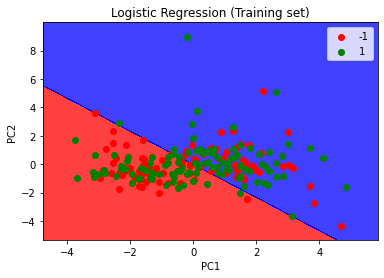

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


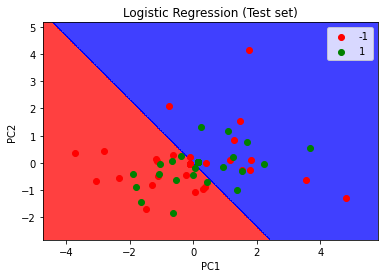

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Cross Validation K-fold for Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.79 %
Standard Deviation: 6.03 %


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,splitter = 'best')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['PCA-DT'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

[[24 15]
 [ 8 26]]
accuracy : 0.684931506849315
precision : 0.6341463414634146
recall : 0.7647058823529411
f1 : 0.6933333333333332


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


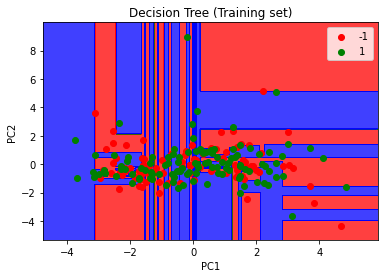

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


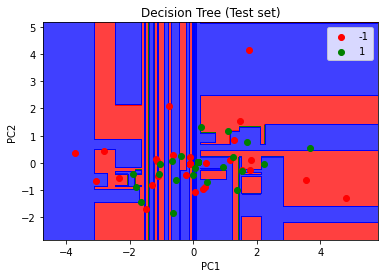

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Cross Validation - K-fold for Decision Tree PCA

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 65.05 %
Standard Deviation: 7.32 %


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 3,weights='distance',algorithm='ball_tree')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, p=3,
                     weights='distance')

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy :',accuracy_score(y_test, y_pred))
print('precision :',precision_score(y_test, y_pred))
print('recall :',recall_score(y_test, y_pred))
print('f1 :',f1_score(y_test, y_pred))
model_evaluation_dictionary['PCA-KNN'] = {'accuracy':accuracy_score(y_test, y_pred),'precision':precision_score(y_test, y_pred),'recall':recall_score(y_test, y_pred),'f1':f1_score(y_test, y_pred)}

[[25 14]
 [10 24]]
accuracy : 0.6712328767123288
precision : 0.631578947368421
recall : 0.7058823529411765
f1 : 0.6666666666666667


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


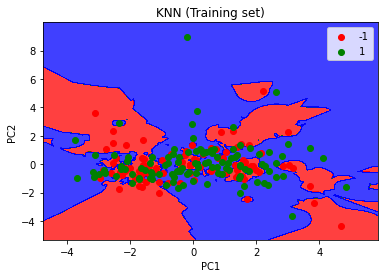

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


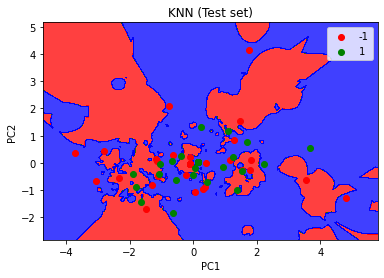

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Cross Validation - K-fold for KNN

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 64.10 %
Standard Deviation: 7.91 %


In [ ]:
pd.DataFrame(model_evaluation_dictionary)

,Logistic,DecisionTree,RandomForest,SVM,NaiveBayes,KNN,GradientBoost,PCA-Logistic,PCA-DT,PCA-KNN
accuracy,0.643836,0.630137,0.589041,0.424658,0.479452,0.698630,0.671233,0.671233,0.684932,0.671233
precision,0.611111,0.600000,0.552632,0.428571,0.400000,0.650000,0.619048,0.647059,0.634146,0.631579
recall,0.647059,0.617647,0.617647,0.705882,0.235294,0.764706,0.764706,0.647059,0.764706,0.705882
f1,0.628571,0.608696,0.583333,0.533333,0.296296,0.702703,0.684211,0.647059,0.693333,0.666667
